In [1]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.animation import TimedAnimation
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import tqdm
import pickle
import os
from astropy.timeseries import LombScargle
from scipy.integrate import RK45, DOP853
from scipy.stats import chi2, iqr
from scipy.signal import argrelextrema, savgol_filter
from scipy.spatial.distance import chebyshev
from scipy.optimize import curve_fit

from pytisean import tiseano, tiseanio


TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

henon: Henon map
opened /private/tmp/pytisean_temp_2022-10-31-13-21-36_ahigqxw8/outFile for output



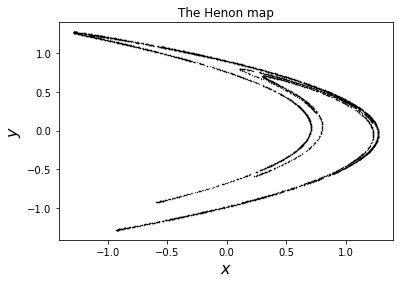

In [2]:
# Generate 5000 iterates of the henon map
henon, msg = tiseano('henon', '-l5000')

# Plot and prettyfi
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(henon[:, 0], henon[:, 1], color='k', s=0.1)
ax1.set_title('The Henon map')
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16)
plt.show()

In [3]:
print(type(henon))
print(type(msg))

<class 'numpy.ndarray'>
<class 'str'>


In [4]:
print(np.shape(henon))

(5000, 2)



TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

corr: Estimates the autocorrelations of a data set

Using /private/tmp/pytisean_temp_2022-10-31-13-21-37_w7qsfu1p/inFile as datafile, reading column 1
Use 1000 lines.
Opened /private/tmp/pytisean_temp_2022-10-31-13-21-37_w7qsfu1p/outFile for writing



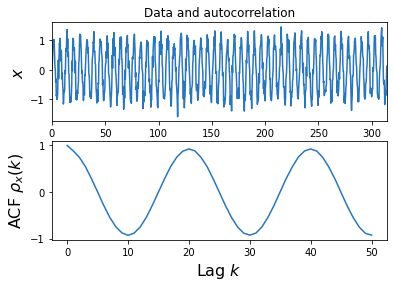

In [5]:
# Generate some data
N = 1000
t = np.linspace(0, N/10*np.pi, N)
x = np.sin(t) + 0.2*np.random.randn(N)
#  ... and compute the autocorrelation
acf, msg = tiseanio('corr', '-D', 50, data=x)

# Plot and prettyfi
bluish = '#2976bb' # https://xkcd.com/color/rgb/
fig2, ax2 = plt.subplots(2, 1)

ax2[0].set_title(r'Data and autocorrelation')
ax2[0].plot(t, x, color=bluish)
ax2[0].set_xlim(t[0], t[-1])
ax2[0].set_xlabel(r'$t$', fontsize=16)
ax2[0].set_ylabel(r'$x$', fontsize=16)

ax2[1].plot(acf[:, 0], acf[:, 1], color=bluish)
ax2[1].set_xlabel(r'Lag $k$', fontsize=16)
ax2[1].set_ylabel(r'ACF $\rho_x(k)$', fontsize=16)

plt.show()


In [6]:
# Reproduce examples in /Users/Emily/Tisean_3.0.1/examples



TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

lorenz: integration of the Lorenz system
opened /private/tmp/pytisean_temp_2022-10-31-13-21-37_k2_koamq/outFile for output
 Lorenz trajectory covering   50.0000000      time units

 Lyapunov exponents [1/unit time]
  0.888911068    
   6.61547063E-04
  -14.5562391    



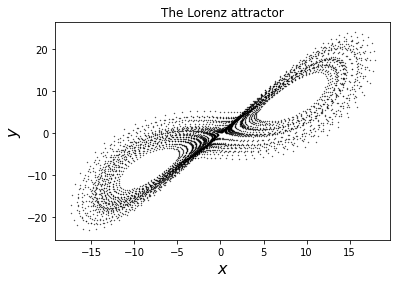

In [7]:
# Generate 5000 iterates of the henon map
lorenz, msg = tiseano('lorenz', '-l5000')

# Plot and prettyfi
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(lorenz[:, 0], lorenz[:, 1], color='k', s=0.1)
ax1.set_title('The Lorenz attractor')
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16)
plt.show()

In [8]:
lorenz, msg = tiseano('lorenz', '-l',5000,'-v',15)


TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

lorenz: integration of the Lorenz system
 *** single output file for multiple input files - results may be overwritten
opened /private/tmp/pytisean_temp_2022-10-31-13-21-37_ttd11zrs/outFile for output
 Lorenz trajectory covering   50.0000000      time units

 Lyapunov exponents [1/unit time]
  0.888911068    
   6.61547063E-04
  -14.5562391    



In [20]:
# generate Lorenz
stdout, msg = tiseano("lorenz", "-l", "5000")


TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

lorenz: integration of the Lorenz system
opened /private/tmp/pytisean_temp_2022-10-31-14-34-54_b67_qyk_/outFile for output
 Lorenz trajectory covering   50.0000000      time units

 Lyapunov exponents [1/unit time]
  0.888911068    
   6.61547063E-04
  -14.5562391    



Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 4991
Maximal epsilon in the moment= 3.531400e+01


TISEAN 3.0.1 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

d2: Estimates the correlation sum, -dimension and -entropy

Using /private/tmp/pytisean_temp_2022-10-31-14-34-54_yddn62wc/inFile as datafile!
Using columns: 1 
Use 5001 lines.

odict_keys(['c2', 'd2', 'h2'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 2)
(990, 2)
(1000, 2)


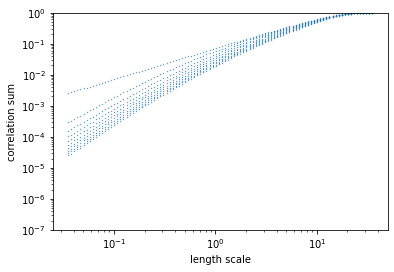

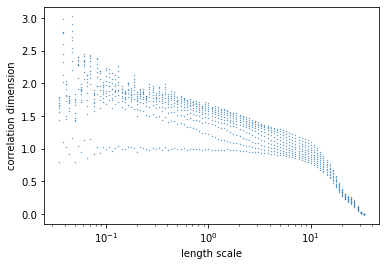

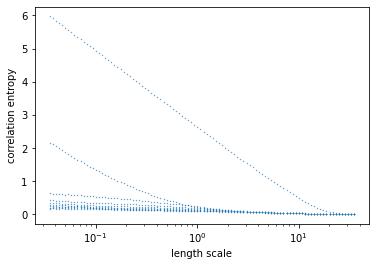

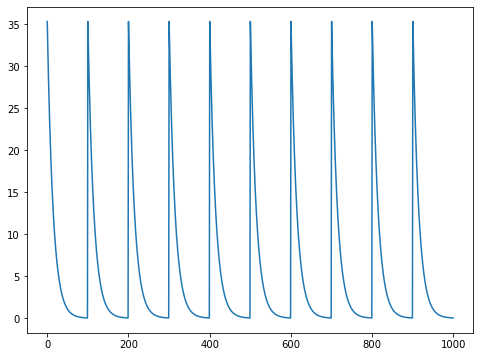

In [21]:
# Multiple output command example (d2)
d2_out, msg = tiseanio("d2", '-N', '0','-c', "1", data=stdout)

print(d2_out.keys())
print(type(d2_out["c2"]))
print(type(d2_out["d2"]))
print(type(d2_out["h2"]))

print(np.shape(d2_out["c2"]))
print(np.shape(d2_out["d2"]))
print(np.shape(d2_out["h2"]))

# plot output c2
plt.scatter(d2_out["c2"][:,0], d2_out["c2"][:,1],s=0.1)
plt.yscale('log')
plt.ylim([1e-7,1])
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation sum")
plt.show()
# plot output d2
plt.scatter(d2_out["d2"][:,0], d2_out["d2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation dimension")
plt.show()
# plot output h2
plt.scatter(d2_out["h2"][:,0], d2_out["h2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation entropy")
plt.show()



fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(d2_out["c2"][:,0])
plt.show()